In [1]:
def MakePMatrix(omega, which_layer, kx0, ky0, Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list):
    det = Uniform_ep_list[which_layer][2][2]*Uniform_mu_list[which_layer][2][2]-Uniform_xi_list[which_layer][2][2]*Uniform_zeta_list[which_layer][2][2]
    
    nuzxee = - (Uniform_mu_list[which_layer][2][2]*Uniform_ep_list[which_layer][2][0]-Uniform_xi_list[which_layer][2][2]*(Uniform_zeta_list[which_layer][2][0]+ky0/omega))/det
    nuzyee = - (Uniform_mu_list[which_layer][2][2]*Uniform_ep_list[which_layer][2][1]-Uniform_xi_list[which_layer][2][2]*(Uniform_zeta_list[which_layer][2][1]-kx0/omega))/det
    nuzxeh = (Uniform_xi_list[which_layer][2][2]*Uniform_mu_list[which_layer][2][0]-Uniform_mu_list[which_layer][2][2]*(Uniform_xi_list[which_layer][2][0]-ky0/omega))/det
    nuzyeh = (Uniform_xi_list[which_layer][2][2]*Uniform_mu_list[which_layer][2][1]-Uniform_mu_list[which_layer][2][2]*(Uniform_xi_list[which_layer][2][1]+kx0/omega))/det
    nuzxhe = (Uniform_zeta_list[which_layer][2][2]*Uniform_ep_list[which_layer][2][0]-Uniform_ep_list[which_layer][2][2]*(Uniform_zeta_list[which_layer][2][0]+ky0/omega))/det
    nuzyhe = (Uniform_zeta_list[which_layer][2][2]*Uniform_ep_list[which_layer][2][1]-Uniform_ep_list[which_layer][2][2]*(Uniform_zeta_list[which_layer][2][1]-kx0/omega))/det
    nuzxhh = - (Uniform_ep_list[which_layer][2][2]*Uniform_mu_list[which_layer][2][0]-Uniform_zeta_list[which_layer][2][2]*(Uniform_xi_list[which_layer][2][0]-ky0/omega))/det
    nuzyhh = - (Uniform_ep_list[which_layer][2][2]*Uniform_mu_list[which_layer][2][1]-Uniform_zeta_list[which_layer][2][2]*(Uniform_xi_list[which_layer][2][1]+kx0/omega))/det   
    
    
    J = np.ones((4,4), dtype = complex)
    
    P = np.zeros((4,4), dtype = complex)
    
    temp0 = np.array([[Uniform_zeta_list[which_layer][1][0], Uniform_zeta_list[which_layer][1][1], Uniform_mu_list[which_layer][1][0], Uniform_mu_list[which_layer][1][1]], [-Uniform_zeta_list[which_layer][0][0], -Uniform_zeta_list[which_layer][0][1], -Uniform_mu_list[which_layer][0][0], -Uniform_mu_list[which_layer][0][1]], [-Uniform_ep_list[which_layer][1][0], -Uniform_ep_list[which_layer][1][1], -Uniform_xi_list[which_layer][1][0], -Uniform_xi_list[which_layer][1][1]], [Uniform_ep_list[which_layer][0][0], Uniform_ep_list[which_layer][0][1], Uniform_xi_list[which_layer][0][0], Uniform_xi_list[which_layer][0][1]]])
    temp1 = np.diag((Uniform_zeta_list[which_layer][1][2]+kx0/omega, -Uniform_zeta_list[which_layer][0][2]+ky0/omega, -Uniform_ep_list[which_layer][1][2], Uniform_ep_list[which_layer][0][2]))
    temp2 = np.diag((nuzxee, nuzyee, nuzxeh, nuzyeh))
    
    temp3 = np.diag((Uniform_mu_list[which_layer][1][2], -Uniform_mu_list[which_layer][0][2], -Uniform_xi_list[which_layer][1][2]+kx0/omega, Uniform_xi_list[which_layer][0][2]+ky0/omega))
    temp4 = np.diag((nuzxhe, nuzyhe, nuzxhh, nuzyhh))
    
    P = omega*(temp0 + temp1 @ J @ temp2 + temp3 @ J @ temp4)
    
    return P


def Kmatrix(n, theta, phi):
    K   = np.array([[-np.sin(phi), -np.cos(phi)*np.cos(theta), -np.sin(phi), np.cos(phi)*np.cos(theta)], [np.cos(phi), -np.sin(phi)*np.cos(theta), np.cos(phi), np.sin(phi)*np.cos(theta)], [-n/eta0*np.cos(phi)*np.cos(theta), n/eta0*np.sin(phi), n/eta0*np.cos(phi)*np.cos(theta), n/eta0*np.sin(phi)], [-n/eta0*np.sin(phi)*np.cos(theta), -n1/eta0*np.cos(phi), n/eta0*np.sin(phi)*np.cos(theta), -n/eta0*np.cos(phi)]])
    
    return K
    
    
def MakeMMatrix(omega, which_layer, kx0, ky0, Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list):
    
    P = MakePMatrix(omega, which_layer, kx0, ky0, Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list)
    
    w, v = np.linalg.eig(P)
    
    expG = np.zeros((4, 4), dtype = complex)
    
    for i in range(4):
        
        expG[i, i] = np.exp(1j*w[i]*thickness_list[which_layer])
    
    M  = v @ expG @ np.linalg.inv(v)
    
    return M

def BandStructure(M, thickness_list):
    
    w, v = np.linalg.eig(M)
    
    q    = np.log(w)/(1j*np.sum(thickness_list))
    
    return q

def RandT(M):
    r  = np.zeros((2,2), dtype = complex)
    t  = np.zeros((2,2), dtype = complex)
    
    det = (M[2,2]*M[3,3] - M[2,3]*M[3,2])
    
    r[0, 0] = (M[2, 3]*M[3,0]-M[2,0]*M[3,3])/det
    r[0, 1] = (M[2, 3]*M[3,1]-M[2,1]*M[3,3])/det
    r[1, 0] = (M[2, 0]*M[3,2]-M[3,0]*M[2,2])/det
    r[1, 1] = (M[2, 1]*M[3,2]-M[3,1]*M[2,2])/det
    
    t[0, 0] = ((M[0, 2]*M[2, 3]-M[0, 3]*M[2, 2])*M[3, 0]+(M[0, 3]*M[2,0]-M[0,0]*M[2, 3])*M[3,2]+(M[0,0]*M[2,2]-M[0, 2]*M[2,0])*M[3,3])/det
    t[0, 1] = M[0, 1] + ((M[0,2]*M[2,3]-M[0, 3]*M[2,2])*M[3,1]+(M[0, 3]*M[3, 2]-M[0, 2]*M[3,3])*M[2,1])/det
    t[1, 0] = ((M[1,2]*M[2,3]-M[1,3]*M[2,2])*M[3,0]+(M[1,3]*M[2,0]-M[1,0]*M[2,3])*M[3,2]+(M[1,0]*M[2,2]-M[1,2]*M[2,0])*M[3,3])/det
    t[1, 1] = M[1,1] + ((M[1,2]*M[2,3]-M[1,3]*M[2,2])*M[3,1]+(M[1,3]*M[3,2]-M[1,2]*M[3,3])*M[2,1])/det
    
    return r, t
    
def RefTrans(r, t, theta, n1, n2):
    Rss = np.abs(r[0,0])**2
    Rsp = np.abs(r[0,1])**2
    Rps = np.abs(r[1,0])**2
    Rpp = np.abs(r[1,1])**2
    
    thetar  = np.arcsin(n1*np.sin(theta)/n2)
    
    Tss = (n2/n1)*(np.real(np.cos(thetar))/np.cos(theta))*np.abs(t[0,0])**2
    Tsp = (n2/n1)*(np.real(np.cos(thetar))/np.cos(theta))*np.abs(t[0,1])**2
    Tps = (n2/n1)*(np.real(np.cos(thetar))/np.cos(theta))*np.abs(t[1,0])**2
    Tpp = (n2/n1)*(np.real(np.cos(thetar))/np.cos(theta))*np.abs(t[1,1])**2
    
    As = 1 - (Rss+Rps+Tss+Tps)
    Ap = 1 - (Rpp+Rsp+Tpp+Tsp)
    
    return Rss, Rsp, Rps, Rpp, Tss, Tsp, Tps, Tpp, As, Ap

In [2]:
import numpy as np
import scipy as sp
import scipy.constants as spcs


# universal constants 
c       = spcs.c
eps0    = spcs.epsilon_0
mu0     = spcs.mu_0
eta0    = np.sqrt(mu0/eps0)

# problem parameters 
m       = 10000
length  = 0.2e-7
omega   = np.linspace(5e10, 7e15, m)
phi     = 0
theta   = 0
n1r     = 1
n2r     = 1
thetar  = np.arcsin(n1r*np.sin(theta)/n2r)


kx0     = np.zeros((m,), dtype = complex)
ky0     = np.zeros((m,), dtype = complex)

for i in range(m):
    kx0[i]  = omega[i]/c*n1r*np.cos(phi)*np.sin(theta)
    ky0[i]  = omega[i]/c*n1r*np.sin(phi)*np.sin(theta)

# material parameters
n1  = 9.3
n2  = 1.1

N1  = 8.9
N2  = 1.3

gamma1 = 3.5
gamma2 = 23

phi1 = -np.pi/8
phi2 = np.pi/8

epA  = (n1**2 + n2**2)/2
delA = (n1**2 - n2**2)/2

epF     = (gamma1*N1+gamma2*N2)/2
alphaF  = (gamma1*N1-gamma2*N2)/2

muF     = (N1/gamma1+N2/gamma2)/2
betaF   = (N1/gamma1-N2/gamma2)/2


epsA = np.array([[epA+delA*np.cos(2*phi1), delA*np.sin(2*phi1), 0], [delA*np.sin(2*phi1), epA-delA*np.cos(2*phi1), 0], [0, 0, epA]])*eps0
muA  = np.array([[1., 0, 0], [0, 1., 0], [0, 0, 1.]])*mu0
xiA  = np.zeros((3,3), dtype = complex)
zetA = np.zeros((3,3), dtype = complex)
dA   = length

epsB = np.array([[epA+delA*np.cos(2*phi2), delA*np.sin(2*phi2), 0], [delA*np.sin(2*phi2), epA-delA*np.cos(2*phi2), 0], [0, 0, epA]])*eps0
muB  = np.array([[1., 0, 0], [0, 1., 0], [0, 0, 1.]])*mu0
xiB  = np.zeros((3,3), dtype = complex)
zetB = np.zeros((3,3), dtype = complex)
dB   = length

epsC = np.array([[epF, 1j*alphaF, 0], [-1j*alphaF, epF, 0], [0, 0, epF]])*eps0
muC  = np.array([[muF, 1j*betaF, 0], [-1j*betaF, muF, 0], [0, 0, muF]])*mu0
xiC  = np.zeros((3,3), dtype = complex)
zetC = np.zeros((3,3), dtype = complex)
dC   = length*0.45


Uniform_ep_list = [epsA, epsB, epsC]
Uniform_mu_list = [muA, muB, muC]
Uniform_xi_list = [xiA, xiB, xiC]
Uniform_zeta_list = [zetA, zetB, zetC]
thickness_list  = [dA, dB, dC]

M1   = np.zeros((m, 4, 4), dtype = complex)
M2   = np.zeros((m, 4, 4), dtype = complex)
M3   = np.zeros((m, 4, 4), dtype = complex)

Ktr  = np.zeros((m, 4, 4), dtype = complex)
Kinc = np.zeros((m, 4, 4), dtype = complex)
M    = np.zeros((m, 4, 4), dtype = complex)

q1    = np.zeros((m, 4), dtype = complex)
q2    = np.zeros((m, 4), dtype = complex)
q3    = np.zeros((m, 4), dtype = complex)
q     = np.zeros((m, 4), dtype = complex)
k     = np.zeros((m, 4), dtype = float)

r    = np.zeros((m, 2, 2), dtype = complex)
t    = np.zeros((m, 2, 2), dtype = complex)

Rss  = np.zeros(m, dtype = float)
Rsp  = np.zeros(m, dtype = float)
Rps  = np.zeros(m, dtype = float)
Rpp  = np.zeros(m, dtype = float)
Tss  = np.zeros(m, dtype = float)
Tsp  = np.zeros(m, dtype = float)
Tps  = np.zeros(m, dtype = float)
Tpp  = np.zeros(m, dtype = float)
As  = np.zeros(m, dtype = float)
Ap  = np.zeros(m, dtype = float)



for i in range(m):
    M1[i] = MakeMMatrix(omega[i], 0, kx0[i], ky0[i], Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
    M2[i] = MakeMMatrix(omega[i], 1, kx0[i], ky0[i], Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
    M3[i] = MakeMMatrix(omega[i], 2, kx0[i], ky0[i], Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
        
    Ktr[i]  = Kmatrix(n2r, thetar, phi)
    Kinc[i] = Kmatrix(n1r, theta, phi)
        
    M[i]  = M3[i] @ M2[i] @ M1[i]
        
    q1[i]  = BandStructure(M1[i], thickness_list[0])
    q2[i]  = BandStructure(M2[i], thickness_list[1])
    q3[i]  = BandStructure(M3[i], thickness_list[2])
    
    q[i]  = BandStructure(M[i], thickness_list)
    
    for j in range(4):
        if np.abs(np.imag(q[i, j])/np.abs(q[i,j])) < 1e-5:
            k[i,j] = np.real(q[i,j])*np.sum(thickness_list)
        else:
            k[i,j] = None
        
    r[i], t[i] = RandT(np.linalg.inv(Ktr[i]) @ M[i] @ Kinc[i])
        
    Rss[i], Rsp[i], Rps[i], Rpp[i], Tss[i], Tsp[i], Tps[i], Tpp[i], As[i], Ap[i] = RefTrans(r[i], t[i], theta, n1, n2) 

([], [])

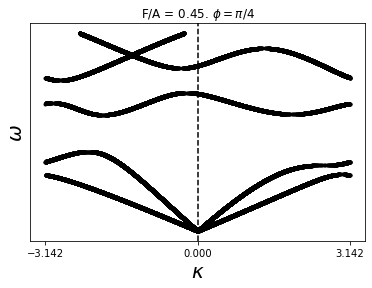

In [8]:
from matplotlib import pyplot as plt 

plt.figure(figsize=(6,4))

plt.title(r"F/A = 0.45. $\phi = \pi/4$")
plt.xlabel(r"$\kappa$", fontsize = 20)
plt.ylabel(r"$\omega$", fontsize = 20)
plt.scatter(k[:, 0], omega, marker='.',  color = "black")
plt.scatter(k[:, 1], omega, marker='.', color = "black")
plt.scatter(k[:, 2], omega, marker='.', color = "black")
plt.scatter(k[:, 3], omega, marker='.', color = "black")
plt.axvline(0, linestyle='--', color='k')
plt.xticks([-np.pi, 0, np.pi])
plt.yticks([])

In [9]:
import numpy as np
import scipy as sp
import scipy.constants as spcs


# universal constants 
c       = spcs.c
eps0    = spcs.epsilon_0
mu0     = spcs.mu_0
eta0    = np.sqrt(mu0/eps0)

# problem parameters 
m       = 10000
length  = 0.2e-7
omega   = np.linspace(5e10, 7e15, m)
phi     = 0
theta   = 0
n1r     = 1
n2r     = 1
thetar  = np.arcsin(n1r*np.sin(theta)/n2r)


kx0     = np.zeros((m,), dtype = complex)
ky0     = np.zeros((m,), dtype = complex)

for i in range(m):
    kx0[i]  = omega[i]/c*n1r*np.cos(phi)*np.sin(theta)
    ky0[i]  = omega[i]/c*n1r*np.sin(phi)*np.sin(theta)

# material parameters
n1  = 9.3
n2  = 1.1

N1  = 8.9
N2  = 1.3

gamma1 = 3.5
gamma2 = 23

phi1 = 0
phi2 = 0

epA  = (n1**2 + n2**2)/2
delA = (n1**2 - n2**2)/2

epF     = (gamma1*N1+gamma2*N2)/2
alphaF  = (gamma1*N1-gamma2*N2)/2

muF     = (N1/gamma1+N2/gamma2)/2
betaF   = (N1/gamma1-N2/gamma2)/2


epsA = np.array([[epA+delA*np.cos(2*phi1), delA*np.sin(2*phi1), 0], [delA*np.sin(2*phi1), epA-delA*np.cos(2*phi1), 0], [0, 0, epA]])*eps0
muA  = np.array([[1., 0, 0], [0, 1., 0], [0, 0, 1.]])*mu0
xiA  = np.zeros((3,3), dtype = complex)
zetA = np.zeros((3,3), dtype = complex)
dA   = length

epsB = np.array([[epA+delA*np.cos(2*phi2), delA*np.sin(2*phi2), 0], [delA*np.sin(2*phi2), epA-delA*np.cos(2*phi2), 0], [0, 0, epA]])*eps0
muB  = np.array([[1., 0, 0], [0, 1., 0], [0, 0, 1.]])*mu0
xiB  = np.zeros((3,3), dtype = complex)
zetB = np.zeros((3,3), dtype = complex)
dB   = length

epsC = np.array([[epF, 1j*alphaF, 0], [-1j*alphaF, epF, 0], [0, 0, epF]])*eps0
muC  = np.array([[muF, 1j*betaF, 0], [-1j*betaF, muF, 0], [0, 0, muF]])*mu0
xiC  = np.zeros((3,3), dtype = complex)
zetC = np.zeros((3,3), dtype = complex)
dC   = length


Uniform_ep_list = [epsA, epsB, epsC]
Uniform_mu_list = [muA, muB, muC]
Uniform_xi_list = [xiA, xiB, xiC]
Uniform_zeta_list = [zetA, zetB, zetC]
thickness_list  = [dA, dB, dC]

M1   = np.zeros((m, 4, 4), dtype = complex)
M2   = np.zeros((m, 4, 4), dtype = complex)
M3   = np.zeros((m, 4, 4), dtype = complex)

Ktr  = np.zeros((m, 4, 4), dtype = complex)
Kinc = np.zeros((m, 4, 4), dtype = complex)
M    = np.zeros((m, 4, 4), dtype = complex)

q1    = np.zeros((m, 4), dtype = complex)
q2    = np.zeros((m, 4), dtype = complex)
q3    = np.zeros((m, 4), dtype = complex)
q     = np.zeros((m, 4), dtype = complex)
k     = np.zeros((m, 4), dtype = float)

r    = np.zeros((m, 2, 2), dtype = complex)
t    = np.zeros((m, 2, 2), dtype = complex)

Rss  = np.zeros(m, dtype = float)
Rsp  = np.zeros(m, dtype = float)
Rps  = np.zeros(m, dtype = float)
Rpp  = np.zeros(m, dtype = float)
Tss  = np.zeros(m, dtype = float)
Tsp  = np.zeros(m, dtype = float)
Tps  = np.zeros(m, dtype = float)
Tpp  = np.zeros(m, dtype = float)
As  = np.zeros(m, dtype = float)
Ap  = np.zeros(m, dtype = float)



for i in range(m):
    M1[i] = MakeMMatrix(omega[i], 0, kx0[i], ky0[i], Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
    M2[i] = MakeMMatrix(omega[i], 1, kx0[i], ky0[i], Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
    M3[i] = MakeMMatrix(omega[i], 2, kx0[i], ky0[i], Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
        
    Ktr[i]  = Kmatrix(n2r, thetar, phi)
    Kinc[i] = Kmatrix(n1r, theta, phi)
        
    M[i]  = M3[i] @ M2[i] @ M1[i]
        
    q1[i]  = BandStructure(M1[i], thickness_list[0])
    q2[i]  = BandStructure(M2[i], thickness_list[1])
    q3[i]  = BandStructure(M3[i], thickness_list[2])
    
    q[i]  = BandStructure(M[i], thickness_list)
    
    for j in range(4):
        if np.abs(np.imag(q[i, j])/np.abs(q[i,j])) < 1e-5:
            k[i,j] = np.real(q[i,j])*np.sum(thickness_list)
        else:
            k[i,j] = None
        
    r[i], t[i] = RandT(np.linalg.inv(Ktr[i]) @ M[i] @ Kinc[i])
        
    Rss[i], Rsp[i], Rps[i], Rpp[i], Tss[i], Tsp[i], Tps[i], Tpp[i], As[i], Ap[i] = RefTrans(r[i], t[i], theta, n1, n2) 

([], [])

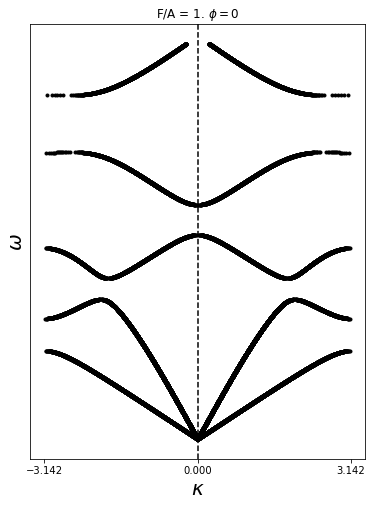

In [10]:
from matplotlib import pyplot as plt 

plt.figure(figsize=(6,8))

plt.title(r"F/A = 1. $\phi = 0$")
plt.xlabel(r"$\kappa$", fontsize = 20)
plt.ylabel(r"$\omega$", fontsize = 20)
plt.scatter(k[:, 0], omega, marker='.',  color = "black")
plt.scatter(k[:, 1], omega, marker='.', color = "black")
plt.scatter(k[:, 2], omega, marker='.', color = "black")
plt.scatter(k[:, 3], omega, marker='.', color = "black")
plt.axvline(0, linestyle='--', color='k')
plt.xticks([-np.pi, 0, np.pi])
plt.yticks([])

In [11]:
import numpy as np
import scipy as sp
import scipy.constants as spcs


# universal constants 
c       = spcs.c
eps0    = spcs.epsilon_0
mu0     = spcs.mu_0
eta0    = np.sqrt(mu0/eps0)

# problem parameters 
m       = 10000
length  = 0.2e-7
omega   = np.linspace(5e10, 5e15, m)
phi     = 0
theta   = 0
n1r     = 1
n2r     = 1
thetar  = np.arcsin(n1r*np.sin(theta)/n2r)


kx0     = np.zeros((m,), dtype = complex)
ky0     = np.zeros((m,), dtype = complex)

for i in range(m):
    kx0[i]  = omega[i]/c*n1r*np.cos(phi)*np.sin(theta)
    ky0[i]  = omega[i]/c*n1r*np.sin(phi)*np.sin(theta)

# material parameters
n1  = 9.3
n2  = 1.1

N1  = 8.9
N2  = 1.3

gamma1 = 3.5
gamma2 = 23

phi1 = -np.pi/4
phi2 = np.pi/4

epA  = (n1**2 + n2**2)/2
delA = (n1**2 - n2**2)/2

epF     = (gamma1*N1+gamma2*N2)/2
alphaF  = (gamma1*N1-gamma2*N2)/2

muF     = (N1/gamma1+N2/gamma2)/2
betaF   = (N1/gamma1-N2/gamma2)/2


epsA = np.array([[epA+delA*np.cos(2*phi1), delA*np.sin(2*phi1), 0], [delA*np.sin(2*phi1), epA-delA*np.cos(2*phi1), 0], [0, 0, epA]])*eps0
muA  = np.array([[1., 0, 0], [0, 1., 0], [0, 0, 1.]])*mu0
xiA  = np.zeros((3,3), dtype = complex)
zetA = np.zeros((3,3), dtype = complex)
dA   = length

epsB = np.array([[epA+delA*np.cos(2*phi2), delA*np.sin(2*phi2), 0], [delA*np.sin(2*phi2), epA-delA*np.cos(2*phi2), 0], [0, 0, epA]])*eps0
muB  = np.array([[1., 0, 0], [0, 1., 0], [0, 0, 1.]])*mu0
xiB  = np.zeros((3,3), dtype = complex)
zetB = np.zeros((3,3), dtype = complex)
dB   = length

epsC = np.array([[epF, 1j*alphaF, 0], [-1j*alphaF, epF, 0], [0, 0, epF]])*eps0
muC  = np.array([[muF, 1j*betaF, 0], [-1j*betaF, muF, 0], [0, 0, muF]])*mu0
xiC  = np.zeros((3,3), dtype = complex)
zetC = np.zeros((3,3), dtype = complex)
dC   = length*2


Uniform_ep_list = [epsA, epsB, epsC]
Uniform_mu_list = [muA, muB, muC]
Uniform_xi_list = [xiA, xiB, xiC]
Uniform_zeta_list = [zetA, zetB, zetC]
thickness_list  = [dA, dB, dC]

M1   = np.zeros((m, 4, 4), dtype = complex)
M2   = np.zeros((m, 4, 4), dtype = complex)
M3   = np.zeros((m, 4, 4), dtype = complex)

Ktr  = np.zeros((m, 4, 4), dtype = complex)
Kinc = np.zeros((m, 4, 4), dtype = complex)
M    = np.zeros((m, 4, 4), dtype = complex)

q1    = np.zeros((m, 4), dtype = complex)
q2    = np.zeros((m, 4), dtype = complex)
q3    = np.zeros((m, 4), dtype = complex)
q     = np.zeros((m, 4), dtype = complex)
k     = np.zeros((m, 4), dtype = float)

r    = np.zeros((m, 2, 2), dtype = complex)
t    = np.zeros((m, 2, 2), dtype = complex)

Rss  = np.zeros(m, dtype = float)
Rsp  = np.zeros(m, dtype = float)
Rps  = np.zeros(m, dtype = float)
Rpp  = np.zeros(m, dtype = float)
Tss  = np.zeros(m, dtype = float)
Tsp  = np.zeros(m, dtype = float)
Tps  = np.zeros(m, dtype = float)
Tpp  = np.zeros(m, dtype = float)
As  = np.zeros(m, dtype = float)
Ap  = np.zeros(m, dtype = float)



for i in range(m):
    M1[i] = MakeMMatrix(omega[i], 0, kx0[i], ky0[i], Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
    M2[i] = MakeMMatrix(omega[i], 1, kx0[i], ky0[i], Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
    M3[i] = MakeMMatrix(omega[i], 2, kx0[i], ky0[i], Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
        
    Ktr[i]  = Kmatrix(n2r, thetar, phi)
    Kinc[i] = Kmatrix(n1r, theta, phi)
        
    M[i]  = M3[i] @ M2[i] @ M1[i]
        
    q1[i]  = BandStructure(M1[i], thickness_list[0])
    q2[i]  = BandStructure(M2[i], thickness_list[1])
    q3[i]  = BandStructure(M3[i], thickness_list[2])
    
    q[i]  = BandStructure(M[i], thickness_list)
    
    for j in range(4):
        if np.abs(np.imag(q[i, j])/np.abs(q[i,j])) < 1e-5:
            k[i,j] = np.real(q[i,j])*np.sum(thickness_list)
        else:
            k[i,j] = None
        
    r[i], t[i] = RandT(np.linalg.inv(Ktr[i]) @ M[i] @ Kinc[i])
        
    Rss[i], Rsp[i], Rps[i], Rpp[i], Tss[i], Tsp[i], Tps[i], Tpp[i], As[i], Ap[i] = RefTrans(r[i], t[i], theta, n1, n2) 

([], [])

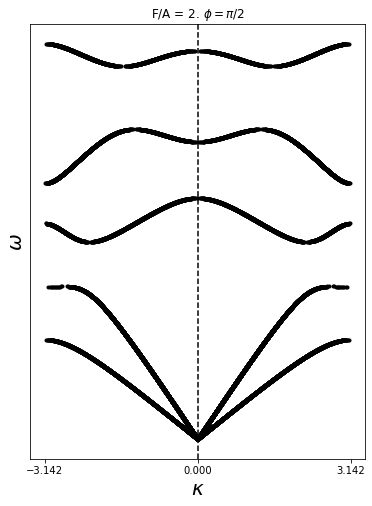

In [12]:
from matplotlib import pyplot as plt 

plt.figure(figsize=(6,8))

plt.title(r"F/A = 2. $\phi = \pi/2$")
plt.xlabel(r"$\kappa$", fontsize = 20)
plt.ylabel(r"$\omega$", fontsize = 20)
plt.scatter(k[:, 0], omega, marker='.',  color = "black")
plt.scatter(k[:, 1], omega, marker='.', color = "black")
plt.scatter(k[:, 2], omega, marker='.', color = "black")
plt.scatter(k[:, 3], omega, marker='.', color = "black")
plt.axvline(0, linestyle='--', color='k')
plt.xticks([-np.pi, 0, np.pi])
plt.yticks([])

In [13]:
import numpy as np
import scipy as sp
import scipy.constants as spcs


# universal constants 
c       = spcs.c
eps0    = spcs.epsilon_0
mu0     = spcs.mu_0
eta0    = np.sqrt(mu0/eps0)

# problem parameters 
m       = 10000
length  = 0.2e-7
omega   = np.linspace(5e10, 3.2e15, m)
phi     = 0
theta   = 0
n1r     = 1
n2r     = 1
thetar  = np.arcsin(n1r*np.sin(theta)/n2r)


kx0     = np.zeros((m,), dtype = complex)
ky0     = np.zeros((m,), dtype = complex)

for i in range(m):
    kx0[i]  = omega[i]/c*n1r*np.cos(phi)*np.sin(theta)
    ky0[i]  = omega[i]/c*n1r*np.sin(phi)*np.sin(theta)

# material parameters
n1  = 19
n2  = 1.1

N1  = 8.9
N2  = 1.3

gamma1 = 3.5
gamma2 = 23

phi1 = -np.pi/8
phi2 = np.pi/8

epA  = (n1**2 + n2**2)/2
delA = (n1**2 - n2**2)/2

epF     = (gamma1*N1+gamma2*N2)/2
alphaF  = (gamma1*N1-gamma2*N2)/2

muF     = (N1/gamma1+N2/gamma2)/2
betaF   = (N1/gamma1-N2/gamma2)/2


epsA = np.array([[epA+delA*np.cos(2*phi1), delA*np.sin(2*phi1), 0], [delA*np.sin(2*phi1), epA-delA*np.cos(2*phi1), 0], [0, 0, epA]])*eps0
muA  = np.array([[1., 0, 0], [0, 1., 0], [0, 0, 1.]])*mu0
xiA  = np.zeros((3,3), dtype = complex)
zetA = np.zeros((3,3), dtype = complex)
dA   = length

epsB = np.array([[epA+delA*np.cos(2*phi2), delA*np.sin(2*phi2), 0], [delA*np.sin(2*phi2), epA-delA*np.cos(2*phi2), 0], [0, 0, epA]])*eps0
muB  = np.array([[1., 0, 0], [0, 1., 0], [0, 0, 1.]])*mu0
xiB  = np.zeros((3,3), dtype = complex)
zetB = np.zeros((3,3), dtype = complex)
dB   = length

epsC = np.array([[epF, 1j*alphaF, 0], [-1j*alphaF, epF, 0], [0, 0, epF]])*eps0
muC  = np.array([[muF, 1j*betaF, 0], [-1j*betaF, muF, 0], [0, 0, muF]])*mu0
xiC  = np.zeros((3,3), dtype = complex)
zetC = np.zeros((3,3), dtype = complex)
dC   = length*1.065


Uniform_ep_list = [epsA, epsB, epsC]
Uniform_mu_list = [muA, muB, muC]
Uniform_xi_list = [xiA, xiB, xiC]
Uniform_zeta_list = [zetA, zetB, zetC]
thickness_list  = [dA, dB, dC]

M1   = np.zeros((m, 4, 4), dtype = complex)
M2   = np.zeros((m, 4, 4), dtype = complex)
M3   = np.zeros((m, 4, 4), dtype = complex)

Ktr  = np.zeros((m, 4, 4), dtype = complex)
Kinc = np.zeros((m, 4, 4), dtype = complex)
M    = np.zeros((m, 4, 4), dtype = complex)

q1    = np.zeros((m, 4), dtype = complex)
q2    = np.zeros((m, 4), dtype = complex)
q3    = np.zeros((m, 4), dtype = complex)
q     = np.zeros((m, 4), dtype = complex)
k     = np.zeros((m, 4), dtype = float)

r    = np.zeros((m, 2, 2), dtype = complex)
t    = np.zeros((m, 2, 2), dtype = complex)

Rss  = np.zeros(m, dtype = float)
Rsp  = np.zeros(m, dtype = float)
Rps  = np.zeros(m, dtype = float)
Rpp  = np.zeros(m, dtype = float)
Tss  = np.zeros(m, dtype = float)
Tsp  = np.zeros(m, dtype = float)
Tps  = np.zeros(m, dtype = float)
Tpp  = np.zeros(m, dtype = float)
As  = np.zeros(m, dtype = float)
Ap  = np.zeros(m, dtype = float)



for i in range(m):
    M1[i] = MakeMMatrix(omega[i], 0, kx0[i], ky0[i], Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
    M2[i] = MakeMMatrix(omega[i], 1, kx0[i], ky0[i], Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
    M3[i] = MakeMMatrix(omega[i], 2, kx0[i], ky0[i], Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
        
    Ktr[i]  = Kmatrix(n2r, thetar, phi)
    Kinc[i] = Kmatrix(n1r, theta, phi)
        
    M[i]  = M3[i] @ M2[i] @ M1[i]
        
    q1[i]  = BandStructure(M1[i], thickness_list[0])
    q2[i]  = BandStructure(M2[i], thickness_list[1])
    q3[i]  = BandStructure(M3[i], thickness_list[2])
    
    q[i]  = BandStructure(M[i], thickness_list)
    
    for j in range(4):
        if np.abs(np.imag(q[i, j])/np.abs(q[i,j])) < 1e-5:
            k[i,j] = np.real(q[i,j])*np.sum(thickness_list)
        else:
            k[i,j] = None
        
    r[i], t[i] = RandT(np.linalg.inv(Ktr[i]) @ M[i] @ Kinc[i])
        
    Rss[i], Rsp[i], Rps[i], Rpp[i], Tss[i], Tsp[i], Tps[i], Tpp[i], As[i], Ap[i] = RefTrans(r[i], t[i], theta, n1, n2) 

([], [])

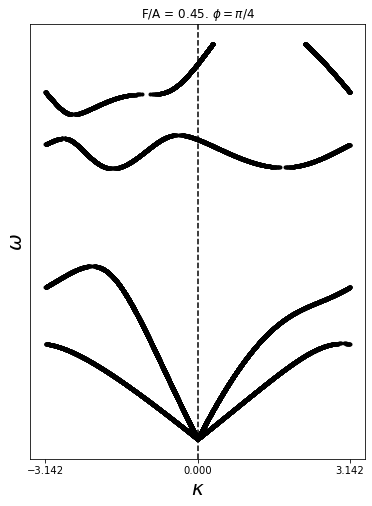

In [173]:
from matplotlib import pyplot as plt 

plt.figure(figsize=(6,8))

plt.title(r"F/A = 0.45. $\phi = \pi/4$")
plt.xlabel(r"$\kappa$", fontsize = 20)
plt.ylabel(r"$\omega$", fontsize = 20)
plt.scatter(k[:, 0], omega, marker='.',  color = "black")
plt.scatter(k[:, 1], omega, marker='.', color = "black")
plt.scatter(k[:, 2], omega, marker='.', color = "black")
plt.scatter(k[:, 3], omega, marker='.', color = "black")
plt.axvline(0, linestyle='--', color='k')
plt.xticks([-np.pi, 0, np.pi])
plt.yticks([])